1.

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

2.

In [2]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=knn, X=iris.data, y=iris.target, cv=kfold)
k_list = []
mean_list = []
for k in range(1, 31):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, iris.data, iris.target, cv=10)
  k_list.append(k)
  mean_list.append(scores.mean())
  print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=96.00%; standard deviation=5.33%
k=2 ; mean accuracy=95.33%; standard deviation=5.21%
k=3 ; mean accuracy=96.67%; standard deviation=4.47%
k=4 ; mean accuracy=96.67%; standard deviation=4.47%
k=5 ; mean accuracy=96.67%; standard deviation=4.47%
k=6 ; mean accuracy=96.67%; standard deviation=4.47%
k=7 ; mean accuracy=96.67%; standard deviation=4.47%
k=8 ; mean accuracy=96.67%; standard deviation=4.47%
k=9 ; mean accuracy=97.33%; standard deviation=3.27%
k=10; mean accuracy=96.67%; standard deviation=4.47%
k=11; mean accuracy=96.67%; standard deviation=4.47%
k=12; mean accuracy=97.33%; standard deviation=3.27%
k=13; mean accuracy=98.00%; standard deviation=3.06%
k=14; mean accuracy=97.33%; standard deviation=4.42%
k=15; mean accuracy=97.33%; standard deviation=3.27%
k=16; mean accuracy=97.33%; standard deviation=3.27%
k=17; mean accuracy=97.33%; standard deviation=3.27%
k=18; mean accuracy=98.00%; standard deviation=3.06%
k=19; mean accuracy=97.33%; standard deviation

3.

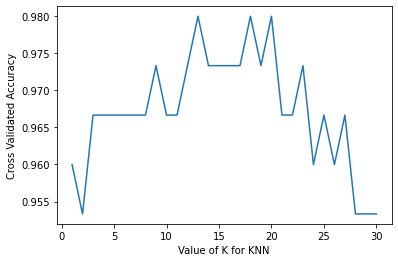

In [3]:
import matplotlib.pyplot as plt
x_label = 'Value of K for KNN'
y_label = 'Cross Validated Accuracy'
plt.xlabel(x_label)
plt.ylabel(y_label)
mean_dict = {x_label: k_list, y_label: mean_list}
plt.plot(x_label, y_label, data=mean_dict)

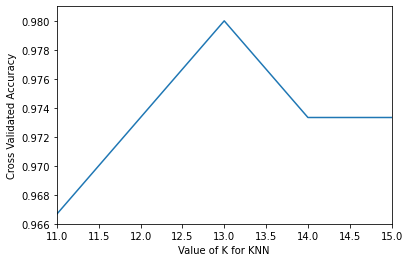

In [4]:
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(11, 15)
plt.ylim(0.966, 0.981)
plt.plot(x_label, y_label, data=mean_dict)

4.

In [5]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=11)
gs = {'n_neighbors': np.arange(1,25)}
knn_gs = KNeighborsClassifier()
knn_param_search = GridSearchCV(knn_gs, gs, cv=10)
knn_param_search.fit(X_train, y_train)
print(knn_param_search.best_score_)
print(knn_param_search.best_params_)

0.9742424242424242
{'n_neighbors': 7}
